## Principal Component Analysis (PCA) in Python

La Principal Component Analysis (PCA) è un'analisi multivariata utilizzata per ridurre la dimensionalità di un insieme di dati, identificando le componenti principali che rappresentano la maggior parte della variazione dei dati. In Python, la libreria scikit-learn fornisce una classe PCA che può essere utilizzata per eseguire la PCA.

In [15]:
#Diamo accesso al nostro google drive che conterrà il dataset che utilizzeremo in questo laboratorio
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [16]:
# Non è necessario eseguire "pip install" delle librerie su Google Colab, in
# quanto sono già presenti nell'ambiente di sviluppo, dato il loro utilizzo
# intensivo in Machine Learning

import numpy as np
import sklearn as sn
import pandas as pd
import requests

Per questo laboratorio, utilizzeremo il dataset *decathlon*, importandolo da locale.

In [17]:
df = pd.read_csv ("drive/MyDrive/Machine Learning 2023-2024/decathlon.csv")

df.head()

,Athlets,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
0,SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
1,CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
2,KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
3,BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
4,YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar


In [18]:
df.dtypes

Athlets         object
100m           float64
Long.jump      float64
Shot.put       float64
High.jump      float64
400m           float64
110m.hurdle    float64
Discus         float64
Pole.vault     float64
Javeline       float64
1500m          float64
Rank             int64
Points           int64
Competition     object
dtype: object

In [19]:
df.describe()

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,10.998049,7.260000,14.477073,1.976829,49.616341,14.605854,44.325610,4.762439,58.316585,279.024878,12.121951,8005.365854
std,0.263023,0.316402,0.824428,0.088951,1.153451,0.471789,3.377845,0.278000,4.826820,11.673247,7.918949,342.385145
min,10.440000,6.610000,12.680000,1.850000,46.810000,13.970000,37.920000,4.200000,50.310000,262.100000,1.000000,7313.000000
25%,10.850000,7.030000,13.880000,1.920000,48.930000,14.210000,41.900000,4.500000,55.270000,271.020000,6.000000,7802.000000
50%,10.980000,7.300000,14.570000,1.950000,49.400000,14.480000,44.410000,4.800000,58.360000,278.050000,11.000000,8021.000000
75%,11.140000,7.480000,14.970000,2.040000,50.300000,14.980000,46.070000,4.920000,60.890000,285.100000,18.000000,8122.000000
max,11.640000,7.960000,16.360000,2.150000,53.200000,15.670000,51.650000,5.400000,70.520000,317.000000,28.000000,8893.000000


In [20]:
df.select_dtypes(["object"]).describe()

,Athlets,Competition
count,41,41
unique,41,2
top,SEBRLE,OlympicG
freq,1,28


Prima di applicare la PCA, è importante standardizzare le variabili numeriche.

In [21]:
variabili_numeriche = list(df.columns[1:-1])
print(variabili_numeriche)

['100m', 'Long.jump', 'Shot.put', 'High.jump', '400m', '110m.hurdle', 'Discus', 'Pole.vault', 'Javeline', '1500m', 'Rank', 'Points']


In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[variabili_numeriche])
scaled_data

array([[ 1.61477791e-01,  1.02393687e+00,  4.33405055e-01,
         1.06045671e+00,  1.69980655e-01,  1.80571557e-01,
        -1.72524347e-01,  9.37988410e-01,  1.02219600e+00,
         1.09931561e+00, -1.42192065e+00,  6.25795966e-01],
       [-9.16292580e-01,  4.47972380e-01, -2.66572563e-01,
        -1.32973498e+00, -2.16222244e-01, -1.19281907e+00,
         1.91655543e+00,  5.73807304e-01,  3.84557695e-01,
         1.94927138e+00, -1.29407253e+00,  3.44883751e-01],
       [ 8.44941928e-02,  1.27992108e-01,  3.59723200e-01,
         7.19000754e-01, -1.09395610e+00, -1.10698215e+00,
         1.38604306e+00,  5.73807304e-01, -1.67937681e+00,
         1.83652215e+00, -1.16622440e+00,  2.76873425e-01],
       [ 8.44941928e-02, -9.59940813e-02, -2.78852872e-01,
        -6.46823072e-01, -6.02425143e-01,  8.24348413e-01,
        -1.03573091e+00,  2.03053173e+00,  9.34101232e-01,
         9.32455207e-02, -1.03837627e+00,  1.82250364e-01],
       [ 1.31623176e+00, -5.43966461e-01,  8.7549618

Andiamo ad eseguire la PCA e a mostrare la varianza spiegata per ogni compontente principale mantenuta

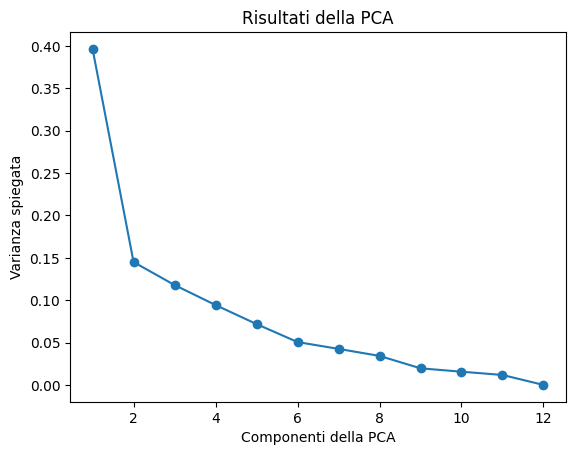

In [23]:
import matplotlib.pyplot as plt

pca = PCA().fit(scaled_data)

# Crea un grafico della varianza spiegata per ogni componente
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Componenti della PCA')
plt.ylabel('Varianza spiegata')
plt.title("Risultati della PCA")
plt.show()

Ora applichiamo la PCA mantenendo le prime **10** componenti principali e mappiamo i record nel nuovo spazio vettoriale generato dalla PCA.

In [24]:
# Applica la PCA per ridurre la dimensionalità dei dati
pca = PCA(n_components=10).fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [25]:
# Quantifichiamo  la percentuale di varianza spiegata da ciascuno delle componenti.
print(pca.explained_variance_ratio_)

[0.39656587 0.14501218 0.11790853 0.09431483 0.07182852 0.05060991
 0.04253755 0.03425704 0.01960072 0.01561364]


In [26]:
#Verifichiamo il coefficienti degli autovalori
eigenvalues = pca.explained_variance_
n_samples = scaled_data.shape[0]
cov_matrix = np.dot(scaled_data.T, scaled_data) / n_samples
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print(eigenvalue)

4.758790388643069
4.877760148359148
1.7401461591576526
1.7836498131365932
1.4149023595074937
1.450274918495182
1.1317779902115839
1.1600724399668747
0.861942279758989
0.8834908367529636
0.6073188641479697
0.6225018357516681
0.5104505900496364
0.5232118548008777
0.41108448895994426
0.42136160118394317
0.2352086569869533
0.2410888734116267
0.18736363564999436
0.1920477265412442


Ora, creiamo un grafico delle osservazioni nella PCA

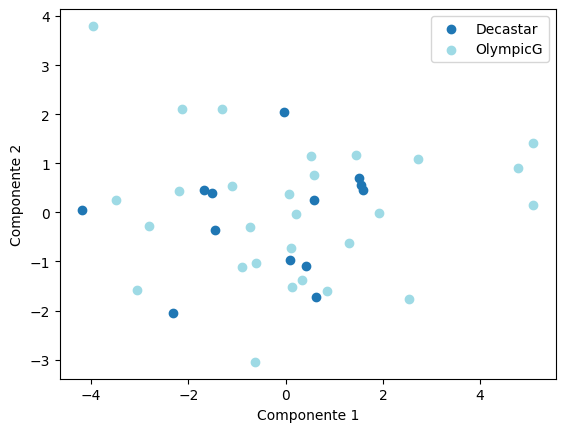

In [27]:
# crea una mappa etichetta-->codice colore
unique_labels = np.unique(df["Competition"])
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_labels)))
label_to_color = dict(zip(unique_labels, colors))

# genera il grafico
fig, ax = plt.subplots()
for label in unique_labels:
    mask = (df["Competition"] == label).values
    ax.scatter(pca_data[mask, 0], pca_data[mask, 1], color=label_to_color[label], label=label)

ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')

ax.legend()

plt.show()

Possiamo visualizzare ogni attributo in un grafico 2D il cui asse x indica il  contributo rispetto prima componente e l'asse y rispetto alla seconda componente. Visualizziamo le proiezioni.

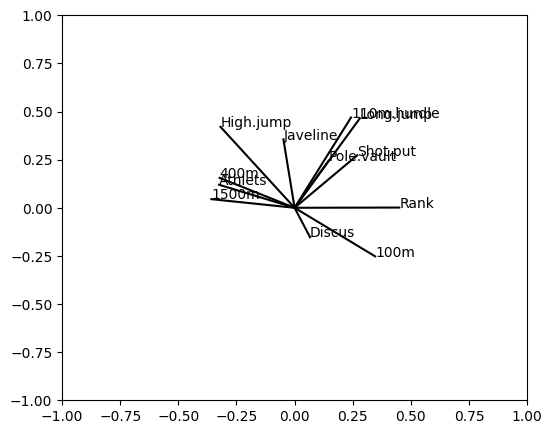

In [28]:
pcs = pca.components_
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # plot line between origin and point (x, y)
    ax.plot([0, x], [0, y], color='k')
    # display the label of the point
    ax.text(x, y, df.columns[i], fontsize='10')

## Assignment

- Analizza il dataset IRIS:
  - Quante componenti sono necessarie per spiegare la varianza nei dati?
  - In un nuovo spazio di rappresentazione, definito dalle componenti principali sopra determinate, i dati sono separabili rispetto alle classi?
  